# Ford Bike Data Analysis
### Exploratory Notebook

This data set has the information of rides on Ford rental bikes and it includes a range of different information dor each time a bike was used.

Users can be either customers or subscribers, with different rates for each. And they can rent a bike from any of the stations and park it at any of the other stations. In the dataset contains the following data for each time a bike is rented out and returned:

- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Start Date
- End Time and End Date
- Start Station ID
- Start Station Name
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude

In this exploration, I will be looking at the data provided. And ask questions generally as well as more specifically about the differences in age groups for users,  the difference in the rides of customers vs subscribers, and breakdowns by month, week or by each day.

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("2017-fordgobike-tripdata.csv")
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [3]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.000000             37.774520   
50%                -122.398870       66.000000             37.783830   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          519700.000000  519700.000000      453159.000000  
mean             -122.363236    1672.533079        1980.404787  
std                 0.105122     971.356959          10.513488  
min              -122.444293      10.000000        1886.000000  
25%              -122.410345     787.000000        1974.000000  
50%              -122.398525    1728.500000        1983.000000  
75%              -122.391034    2520.000000        1988.000000  
max              -121.874119    3733.000000        1999.000000

Let's clean up the data a little so that we can break things up into time, month, day, etc

In [4]:
df['start_time']=pd.to_datetime(df['start_time'])
df['start_time_date']=df['start_time'].dt.date
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['start_time_hour']=df['start_time'].dt.hour
df['start_time_weekday']=df['start_time'].dt.weekday_name

df['end_time']=pd.to_datetime(df['end_time'])
df['end_time_date']=df['end_time'].dt.date
df['end_time_month']=df['end_time'].dt.month.astype(int)
df['end_time_hour']=df['end_time'].dt.hour
df['end_time_weekday']=df['end_time'].dt.weekday_name

df['duration_min'] = df['duration_sec']/60

Now, lets add some bins for the member ages in order to better represent them

In [5]:
df['member_age'] = 2019-df['member_birth_year']

In [6]:
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else x)

Let's take another look at our dataframe now to see what we are working with.

In [7]:
df.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   ...  start_time_month  start_time_hour start_time_weekday  end_time_date  \
0  ...                12               16             Sunday     2018-01-01   
1  ...                12               15             Sunday     2018-01-01   
2  ...                12               22             Sunday     2018-01-01   
3  ...                12               17             Sunday     2018-01-01   
4  ...                12               14             Sunday     2018-01-01   

  end_time_month end_time_hour  end_time_weekday  duration_min member_age  \
0              1            15            Monday   1335.166667       32.0   
1              1            13            Monday   1313.333333       54.0   
2              1            11            Monday    762.800000        NaN   
3              1            10            Monday   1036.200000        NaN   
4              1             2            Monday    726.716667       22.0   

  member_age_bins  
0         30 - 40  
1         50 - 60  
2             NaN  
3             NaN  
4         20 - 30  

[5 rows x 26 columns]

Looks great, now lets visualize some data from it

### What is the age breakdown for the users?

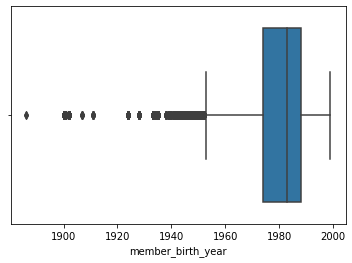

In [8]:
sb.boxplot(x='member_birth_year', data=df)

looks like there are some outliers, lets exclude those and drop the year

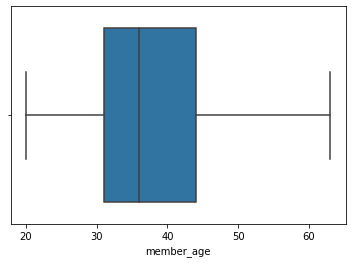

In [9]:
df = df[df['member_age'] <= 63]
sb.boxplot(x='member_age', data=df)
df.drop(['member_birth_year'], axis=1, inplace=True)
plt.savefig('pics/0.png');

Let's look at a 5 point summary of the member age data that we have

In [10]:
percentile(df['member_age'], [25, 50, 75])

array([31., 36., 44.])

In [11]:
data_min, data_max = df['member_age'].min(), df['member_age'].max()
print(data_min, data_max)

20.0 63.0


In [12]:
df['member_age'].mean()

37.92452494396197

### Looking at the data as a whole, what are the daily ride trends?

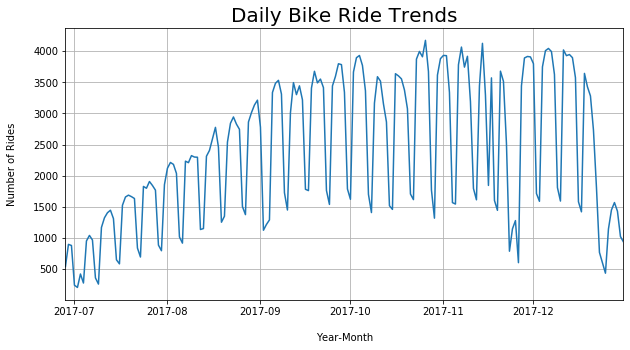

In [13]:
df.groupby('start_time_date').agg('count')['bike_id'].plot(figsize = [10, 5])
plt.title('Daily Bike Ride Trends', fontsize=20)
plt.xlabel('Year-Month', labelpad=16)
plt.ylabel('Number of Rides', labelpad=16)
plt.grid()
plt.savefig('pics/1.png')

You can see that with basically every week there are some highs and some lows, we'll go back to figure out why later on when we look at the breakdown by DOW

### What about monthly?

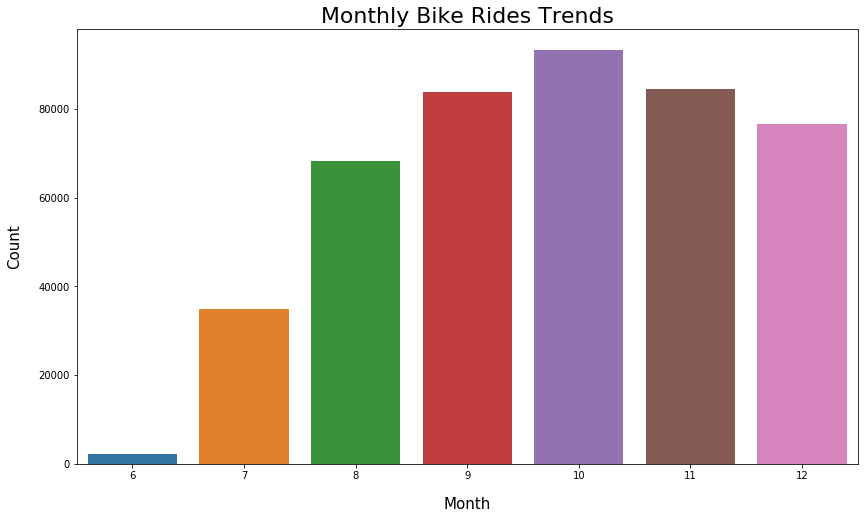

In [14]:
plt.figure(figsize=(14,8))
sb.countplot(data = df, x = "start_time_month")
plt.title('Monthly Bike Rides Trends', fontsize=22)
plt.xlabel('Month', labelpad=16, fontsize = 15)
plt.ylabel('Count', labelpad=16, fontsize = 15)
plt.savefig('pics/2.png');

You can tell that the numbers will be high in the warmer months in the year. When december comes by, its too cold and not as many people will be going on bike rides.

### Is there a difference in gender of our users?

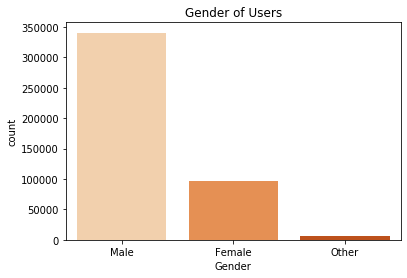

In [15]:
sb.countplot(data = df, x = 'member_gender', palette='Oranges')
plt.title('Gender of Users')
plt.xlabel('Gender')
plt.savefig('pics/3.png')

Much more male than female or other. Remember that this is for each ride are they male or female, there could be 1 male accounting for 10 if he rides 10 times, still useful information

### What is the breakdown of number of rides per hour in the day?

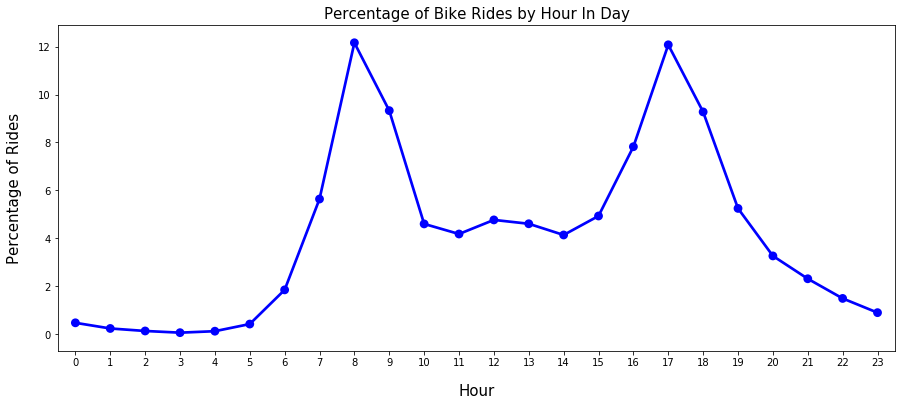

In [16]:
trip_by_hour = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour['bike_id'] = (trip_by_hour['bike_id']/trip_by_hour['bike_id'].sum())*100

plt.figure(figsize=(15,6))
sb.pointplot(x='start_time_hour', y='bike_id', color='blue', data=trip_by_hour)
plt.title('Percentage of Bike Rides by Hour In Day', fontsize = 15)
plt.xlabel('Hour', labelpad=16, fontsize = 15)
plt.ylabel('Percentage of Rides', labelpad=16, fontsize = 15)
plt.savefig('pics/4.png')

Looks like the biggest hours are before and after work, showing that most of the users use the bikes for going to and form work.

### Let's look at now trends broken down by Age and Month

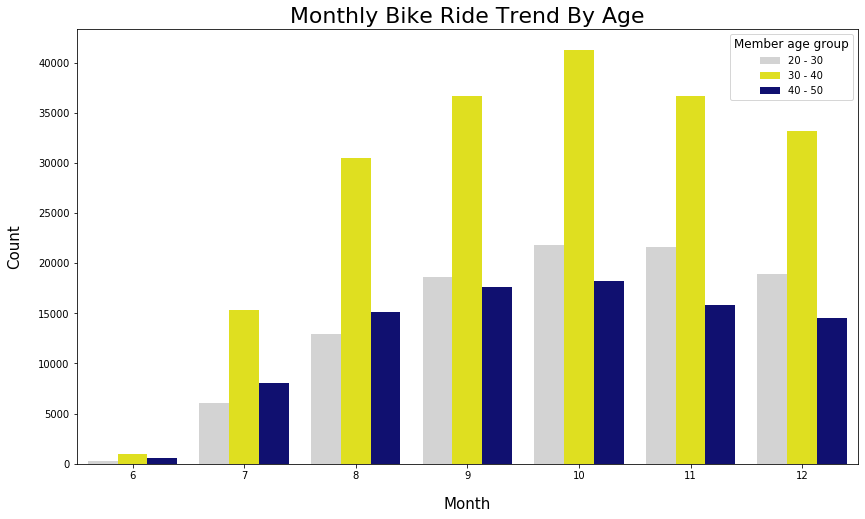

In [17]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'lightgrey', '30 - 40': 'yellow', '40 - 50': 'navy'}
ax = sb.countplot(x='start_time_month', hue='member_age_bins', palette=my_palette, data=df[df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_month', 'member_age_bins']))
plt.title('Monthly Bike Ride Trend By Age', fontsize=22)
plt.xlabel('Month', labelpad=16, fontsize = 15)
plt.ylabel('Count', labelpad=16, fontsize = 15)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':12})
plt.savefig('pics/5.png');

Pretty similar breakdown by each group of rides growing and then falling again.

### And then bike rides per gender

It is probably similar, but may be different than our users gender breakdown

In [18]:
gender = df.groupby('member_gender').size().reset_index(name='count')
gender['count']/len(df)

0    0.219246
1    0.766841
2    0.013913
Name: count, dtype: float64

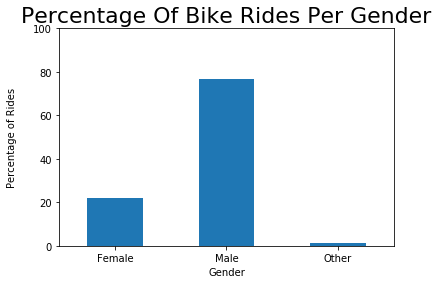

In [19]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

trip_by_gender_df['perc'].plot(kind='bar')
plt.title('Percentage Of Bike Rides Per Gender', fontsize=22)
plt.xlabel('Gender')
plt.ylabel('Percentage of Rides', labelpad=16)
plt.ylim(0,100)
plt.xticks(rotation=360)
plt.savefig('pics/6.png');

This is more helpful for gender because it shows percentages

### Let's break it down by percentage of rides per weekday now

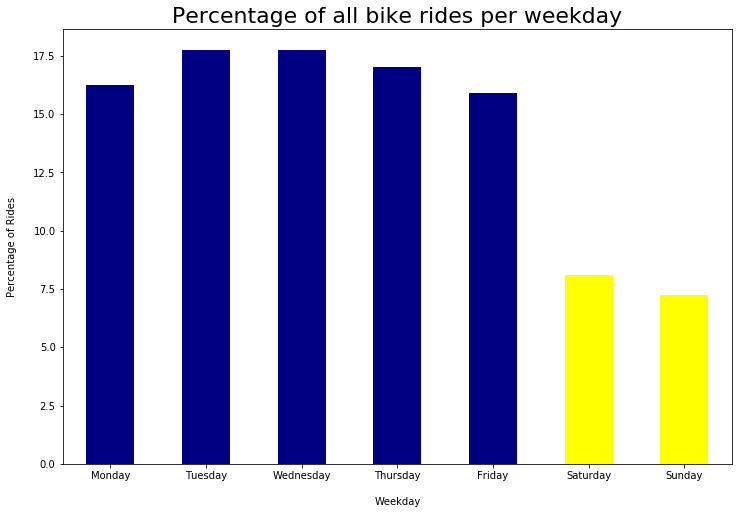

In [20]:
trip_by_weekday_df = df.groupby('start_time_weekday').agg({'bike_id':'count'})

trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'yellow', 'yellow']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Percentage of Rides', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('pics/7.png');

Looking back on what we saw earlier, each week the weekdays are the biggest production, and then the weekends yield the smallest 2 days

## Difference Between Customers and Subscribers

In [21]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')

count_of_rides_per_user_type['count']/len(df)

0    0.108778
1    0.891222
Name: count, dtype: float64

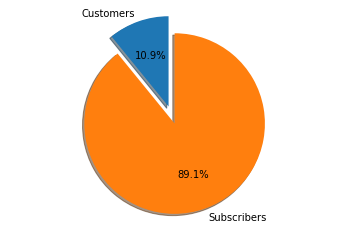

<Figure size 432x288 with 0 Axes>

In [22]:
labels = 'Customers', 'Subscribers'
sizes = count_of_rides_per_user_type['count']/len(df)
explode = (0, 0.2)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
plt.savefig('pics/8.png');

In [23]:
user_type_count_per_year_df = df.groupby(["start_time_month", "user_type"]).size().reset_index()

Looks like 89.1% of rides come from subscribers, the other 10.9% coming from customers

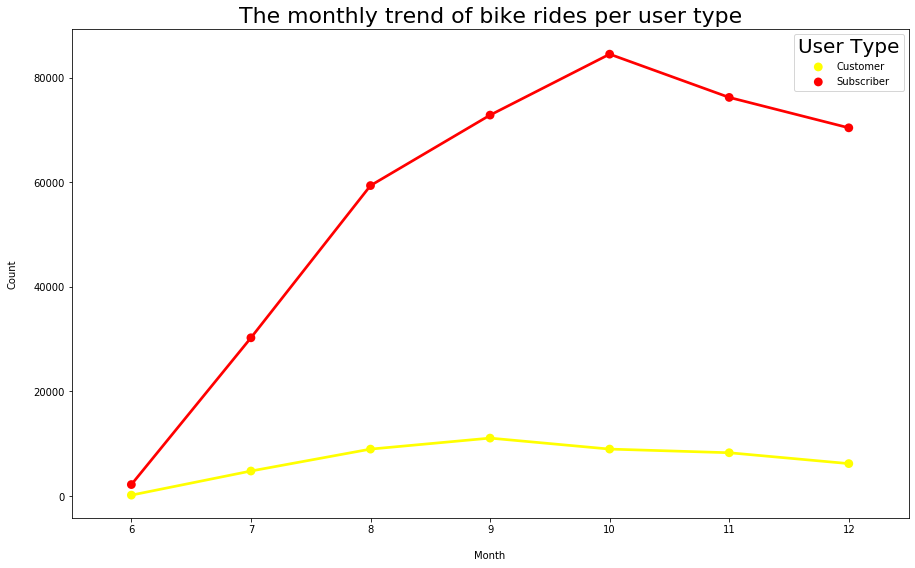

In [24]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'red', 'Customer':'yellow'}
ax = sb.pointplot(x='start_time_month', y=0, hue='user_type', palette=my_palette, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22)
plt.xlabel('Month', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':20})
plt.savefig('pics/9.png');

This is cool because it looks like there's a growing number of subscribers, as well as a steady number of new customers, which turn into subscribers if they enjoy the ride

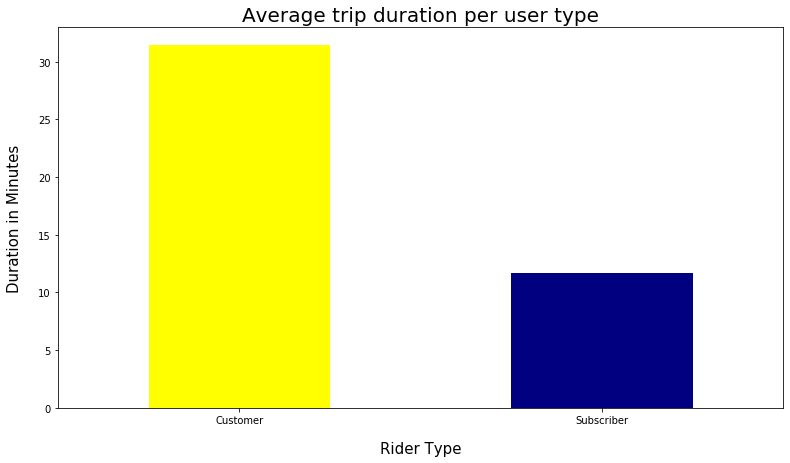

In [25]:
new_color=['yellow', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='bar', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20)
ax.set_ylabel('Duration in Minutes', labelpad=16, fontsize=15)
ax.set_xlabel('Rider Type', labelpad=16, fontsize=15)
plt.xticks(rotation=360)
plt.savefig('pics/10.png');

This is interesting because the mean for customers is way higher than subscribers. This may be because of a couple outliers but it is cool to think about the people riding the bikes leisurely spend more time on them, could be useful information

In [26]:
df.groupby('user_type')['duration_min'].mean()

user_type
Customer      31.418491
Subscriber    11.727001
Name: duration_min, dtype: float64

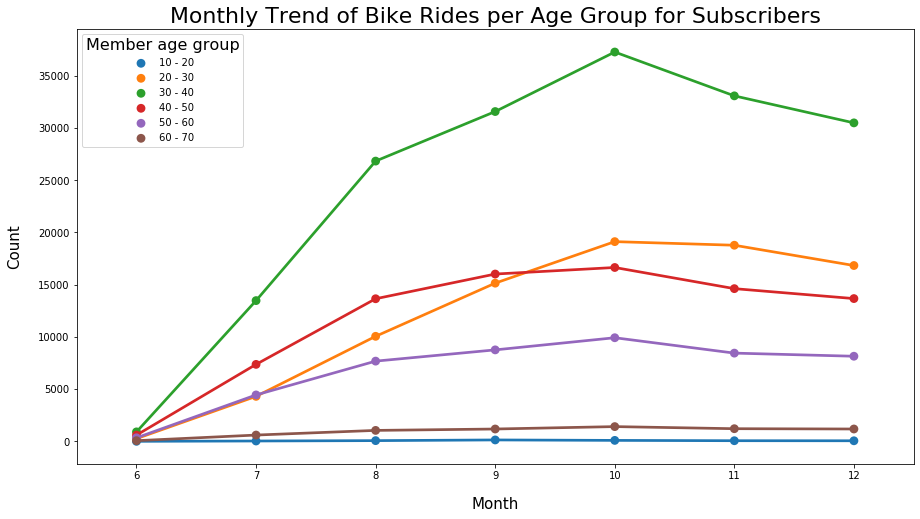

In [27]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_month', y='bike_id', hue='member_age_bins', data=subscriber_age_df)
plt.title("Monthly Trend of Bike Rides per Age Group for Subscribers", fontsize=22)
plt.xlabel('Month', labelpad=16, fontsize=15)
plt.ylabel('Count', labelpad=16, fontsize=15)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
plt.savefig('pics/11.png');

This graph shows that through the cold months, subscribers still drop down but not as heavily as the users as a whole, that must mean the customers do..

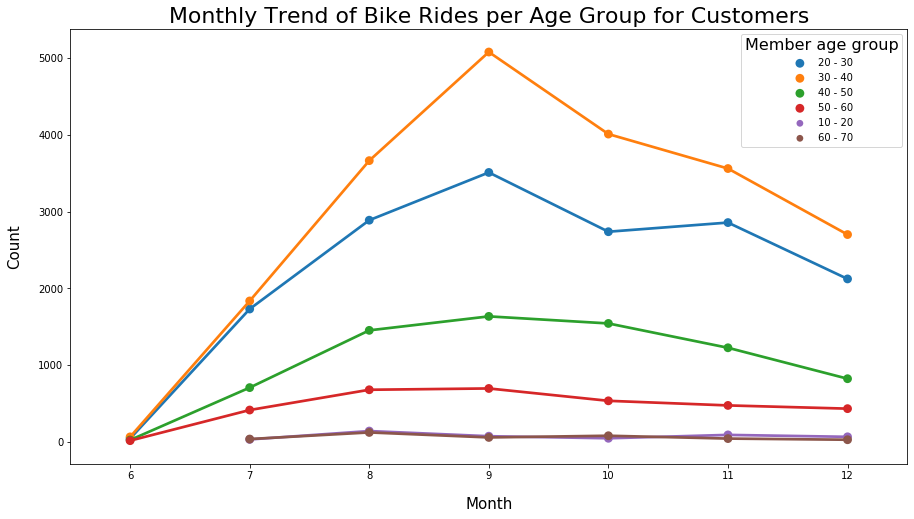

In [28]:
customer_age_df = df[df['user_type']=='Customer'].groupby(['start_time_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_month', y='bike_id', hue='member_age_bins', data=customer_age_df)
plt.title("Monthly Trend of Bike Rides per Age Group for Customers", fontsize=22)
plt.xlabel('Month', labelpad=16, fontsize=15)
plt.ylabel('Count', labelpad=16, fontsize=15)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
plt.savefig('pics/12.png');

Yep, looks like the weather effects the customers much more than subscribers because its harder to enjoy a bike ride when it is really cold outside

## Multivariate Exploration

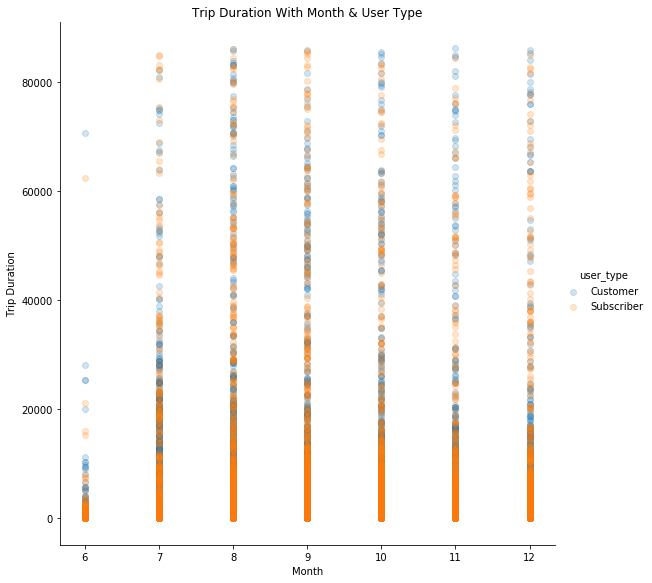

In [29]:
g = sb.FacetGrid(data=df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_time_month','duration_sec', alpha = 1/5)
g.add_legend()
plt.title('Trip Duration With Month & User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration');
plt.savefig('pics/13.png');

As we can see, the subscribers have the majority of the rides, especially those with shorter durations. When we go into the longer rides, it becomes a little more even, but still the subscribers take the majority of the rides.

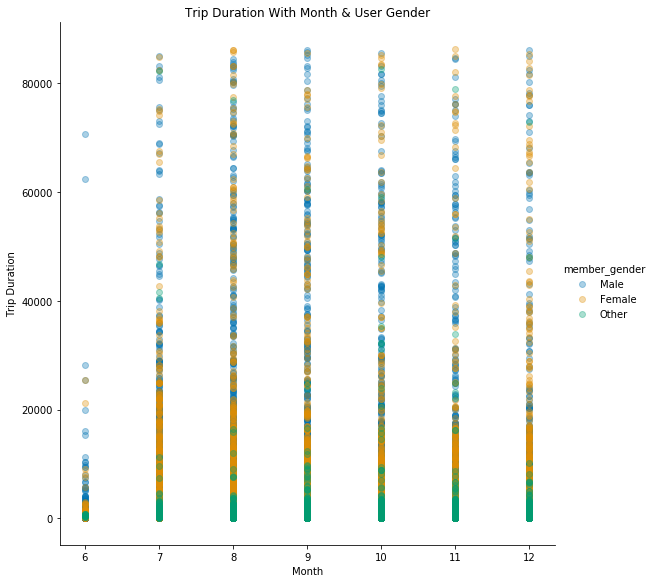

In [30]:
g = sb.FacetGrid(data=df, palette='colorblind', hue = 'member_gender', height = 8)
g.map(plt.scatter, 'start_time_month','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration With Month & User Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration');
plt.savefig('pics/14.png');

Just like we saw earlier, males have more trips than females. When you look at the shortest trip durations, its hard to tell exactly because of the great number of "other" users having many rides, but looking at the longer durations you can see it more cleaerly

It is also interesting that in July and August, Female and Other have a lot of the shorter rides.

## Sources
https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
https://docs.python.org/2/library/datetime.html